# Описание данных

Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.

# Задание
*	Выявите тип и формулу зависимости оклада, премии и доплат от приведенных в таблице данных
*	Выявите все возможные зависимости между размерами оклада, премии и доплат


# Формулы зависимости оклада, премии и доплат

In [89]:
#Загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [22]:
#Считаем данные
data = pd.read_excel('/content/drive/MyDrive/data.xlsx')

In [23]:
#Посмотрим на сами данные
data

,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,2009-01-01,Нагревальщик металла,7,Нагревательные печи,22,580,26020.000000
1,2009-01-01,Нагревальщик металла,6,Нагревательные печи,22,580,22980.000000
2,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, нагрев",22,580,20350.000000
3,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, кантовка",22,580,20350.000000
4,2009-01-01,Нагревальщик металла,4,Нагревательные печи,22,580,18090.000000
...,...,...,...,...,...,...,...
259,2009-08-01,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,1180,26342.235294
260,2009-09-01,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,1080,25044.588235
261,2009-10-01,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,780,22060.000000
262,2009-11-01,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,1020,24266.000000


1. Так как доход сотрудников состоит из оклада, премии и доплат, которые необходимо определить, то он является целевой переменной.
$$Доход = Оклад + Премия + Доплата$$

2. Количественным признаком является `Разряд`,`Объем производства`, `Вредность (балл.)` порядковым - `Месяц`.
3. К категориальным признакам относятся все остальные. 

In [68]:
#Добавим специализацию в зависимости от всех категориальных признаков
data['Специалист'] = data['Профессия'] + data['Разряд'] + data['Оборудование'] +  
         [str(data['Вредность (балл.)'][i]) for i in range(len(data['Вредность (балл.)']))]

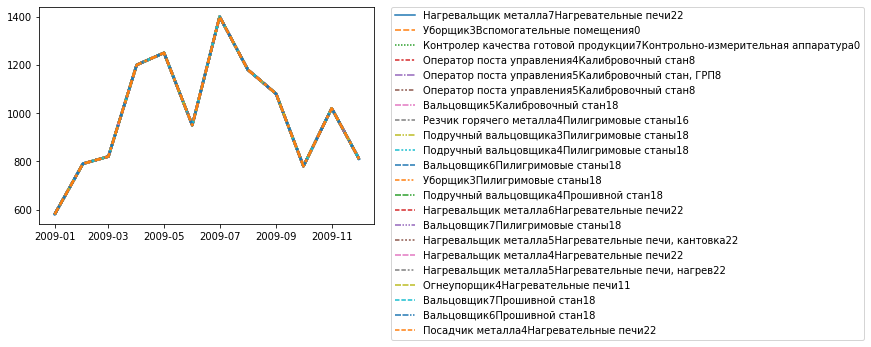

In [25]:
data  = data.sort_values(by='Месяц')
data = data.reset_index(drop=True)
outcomes = data['Объем производства'].to_numpy().reshape(12,22)
dates = data['Месяц'].unique()
graph1 = pd.DataFrame(outcomes,dates,columns=data['Специалист'].unique())
sns.lineplot(data=graph1, palette="tab10", linewidth=2.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Объем производства совпадает у всех категорий профессий в каждом месяце.

In [26]:
data[data['Доход']==min(data['Доход'])]

,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Специалист
1,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0,Уборщик3Вспомогательные помещения0
24,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.0,Уборщик3Вспомогательные помещения0
52,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.0,Уборщик3Вспомогательные помещения0
204,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.0,Уборщик3Вспомогательные помещения0
242,2009-12-01,Уборщик,3,Вспомогательные помещения,0,810,12180.0,Уборщик3Вспомогательные помещения0


## Оклад

In [27]:
salary = min(data['Доход'])
data['Оклад'] = salary

Так как минимальный доход у уборщика 3 разряда с рейтингом вредности 0 баллов, то примем это значение дохода как стартовый размер оклада (переменная `salary`).
Следовательно формула оклада:

$$Оклад = 12180 - минимальное\ значение\ дохода\ (т.е. без\ каких-либо\ премий\ и\ доплат)
$$

## Доплаты
Для того, чтобы определить типы доплат, рассмотрим подвыборку профессий `Нагревальщик металлов`, которые различаются только в разряде.


In [28]:
data1 = data[data['Профессия']=='Нагревальщик металла']
data1 = data1.sort_values(by=['Месяц','Разряд'])

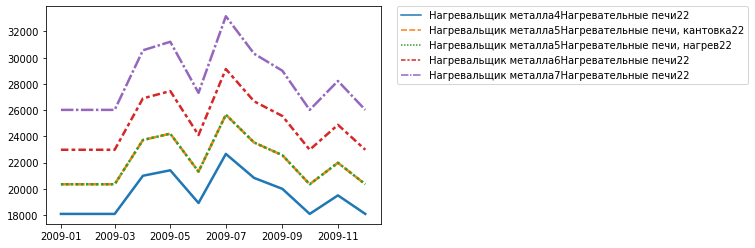

In [29]:
#Для каждого специалиста выведем график доходов:
incomes = data1['Доход'].to_numpy().reshape((-1,len(data1['Специалист'].unique())))
dates = data1['Месяц'].unique()
graph1 = pd.DataFrame(incomes,dates,columns=data1['Специалист'].unique())
sns.lineplot(data=graph1, palette="tab10", linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

1. Характер кривых у специалистов разных разрядов идентичный, следовательно за повышение разряда полагается фиксированная доплата, причем с каждым повышением разряда доплата выше.
2. У специалистов одного разряда, работающих на разном оборудовании одинаковый доход, следовательно, переменная `Оборудование` не влияет на уровень дохода.
3. Минимальный доход у всех категорий специалистов с января по март, а также в в октябре и декабре. Если взглянуть на график объема производства, данные точки также являются наименьшими, что позволяет предположить, что в эти месяцы не предполагалось доплат, связанных с превышением объема производства.

In [69]:
supplement7 = min(data[data['Специалист']=='Нагревальщик металла7Нагревательные печи22']['Доход'])-
                 min(data[data['Специалист']=='Нагревальщик металла6Нагревательные печи22']['Доход'])
supplement6 = min(data[data['Специалист']=='Нагревальщик металла6Нагревательные печи22']['Доход'])-
                 min(data[data['Специалист']=='Нагревальщик металла5Нагревательные печи, кантовка22']['Доход'])
supplement5 = min(data[data['Специалист']=='Нагревальщик металла5Нагревательные печи, кантовка22']['Доход'])-
                 min(data[data['Специалист']=='Нагревальщик металла4Нагревательные печи22']['Доход'])
print(supplement7,supplement6,supplement5)

3040.0 2630.0 2260.0


Для того, чтобы определить доплату за 4 разряд, найдем профессию, в которой имеется 3 и 4 разряды, а также совпадают остальные категориальные признаки.

Этим условиям удовлетворяет профессия `Подручный вальцовщика`. 

In [31]:
specs = data[data['Месяц']=='2009-01-01'] #Подвыборка доходов всех уникальных специалистов за январь
specs[specs['Разряд'].isin(['3', '4'])].sort_values(by=['Профессия']) #Выберем из них специалистов 3 и 4 разряда

,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Специалист,Оклад
16,2009-01-01,Нагревальщик металла,4,Нагревательные печи,22,580,18090.0,Нагревальщик металла4Нагревательные печи22,12180.0
18,2009-01-01,Огнеупорщик,4,Нагревательные печи,11,580,16110.0,Огнеупорщик4Нагревательные печи11,12180.0
3,2009-01-01,Оператор поста управления,4,Калибровочный стан,8,580,15570.0,Оператор поста управления4Калибровочный стан8,12180.0
8,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,15420.0,Подручный вальцовщика3Пилигримовые станы18,12180.0
9,2009-01-01,Подручный вальцовщика,4,Пилигримовые станы,18,580,17370.0,Подручный вальцовщика4Пилигримовые станы18,12180.0
12,2009-01-01,Подручный вальцовщика,4,Прошивной стан,18,580,17370.0,Подручный вальцовщика4Прошивной стан18,12180.0
21,2009-01-01,Посадчик металла,4,Нагревательные печи,22,580,18090.0,Посадчик металла4Нагревательные печи22,12180.0
7,2009-01-01,Резчик горячего металла,4,Пилигримовые станы,16,580,17010.0,Резчик горячего металла4Пилигримовые станы16,12180.0
1,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0,Уборщик3Вспомогательные помещения0,12180.0
11,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0,Уборщик3Пилигримовые станы18,12180.0


In [32]:
supplement4 = min(data[data['Специалист']=='Подручный вальцовщика4Пилигримовые станы18']['Доход']) - 
                 min(data[data['Специалист']=='Подручный вальцовщика3Пилигримовые станы18']['Доход'])
supplement4

1950.0

Проанализируем доплаты за разряды, чтобы определить формулу. За каждое повышение разряда предполагается доплата в размере 1950, 2260, 2630, 3040 рублей. А это в свою очередь можно представить как:

$$Доплата \ за \  4 \ разряд = 1950 \\ Доплата \ за \  5 \ разряд =Доплата \ за \  4 \ разряд +1950+310 \\ Доплата \ за \  6 \ разряд =Доплата \ за \  5 \ разряд + 1950+370 \\ Доплата \ за \  7 \ разряд =Доплата \ за \  6 \ разряд +1950+410$$

Таким образом, общую формулу для расчета доплаты за разряд можно представить как:
$$Доплата \ за \ i \ разряд = 1950 \ *(i-3)+[i>4] \ *310 \ * (i-5)+ [i>5] \ *60 \  * (i-5) + 40 \ *[i=7], \\
где \ [i>k] = \begin{equation*}
 \begin{cases}
   1, i>k \\
   0, i \le k
 \end{cases}
\end{equation*}
$$

\\
Рассмотрим доплаты за вредность. В таблице выше есть два специалиста с разными значениями вредности - Уборщик 0 и 18 баллов. Доплата составляет 3240 рублей, что есть 180 рублей/ балл.
$$Доплата \ за \  вредность = 180 * балл$$

В таком случае получим формулу доплаты:
$$ Доплата = Доплата \ за \ разряд + Доплата \ за \ вредность$$
Проверим так ли это на других категорях профессий.


In [33]:
specs.sort_values(by=['Профессия'])[specs['Вредность (балл.)']==22]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Специалист,Оклад
17,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, нагрев",22,580,20350.0,"Нагревальщик металла5Нагревательные печи, нагр...",12180.0
16,2009-01-01,Нагревальщик металла,4,Нагревательные печи,22,580,18090.0,Нагревальщик металла4Нагревательные печи22,12180.0
15,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, кантовка",22,580,20350.0,"Нагревальщик металла5Нагревательные печи, кант...",12180.0
13,2009-01-01,Нагревальщик металла,6,Нагревательные печи,22,580,22980.0,Нагревальщик металла6Нагревательные печи22,12180.0
0,2009-01-01,Нагревальщик металла,7,Нагревательные печи,22,580,26020.0,Нагревальщик металла7Нагревательные печи22,12180.0
21,2009-01-01,Посадчик металла,4,Нагревательные печи,22,580,18090.0,Посадчик металла4Нагревательные печи22,12180.0


In [34]:
specs['Доход'][21]-(1950+22*180) == salary #Вычтем из дохода Посадчика металла доплату за разряд и вредность и сравним с salary

True

In [35]:
data['Доплата за вредность'] = data['Вредность (балл.)']*180
data['Доплата за разряд'] = np.nan
def rate_supplement(data):
  for i in range(len(data['Разряд'])):
    if data.loc[i,'Разряд'] == '4':
      data.loc[i, 'Доплата за разряд'] = 1950
    elif data.loc[i,'Разряд'] == '5':
      data.loc[i, 'Доплата за разряд'] = 4210
    elif data.loc[i,'Разряд'] == '6':
      data.loc[i, 'Доплата за разряд'] = 6840
    elif data.loc[i,'Разряд'] == '7':
      data.loc[i, 'Доплата за разряд'] = 9880
    else:
      data.loc[i, 'Доплата за разряд'] = 0
rate_supplement(data)

## Премии
Для расчета премии рассмотрим зависимость надбавок к доходу в зависимости от превышения объема производства внутри одной категории профессии, чтобы понять, как разряд влияет на премию. Также это позволит определить минимальный объем производства, который необходимо превысить для ее получения.


In [139]:
extras = np.array([])
volumes = np.array([])
for i in range(len(data['Специалист'].unique())):
  subsample = data[data['Специалист']==data['Специалист'].unique()[i]].reset_index(drop=True)
  #Для каждого специалиста определим величину премии за 1 единицу объема производства. 
  #Для этого выберем два значения, которые превышают минимальные значения, так как порог нам неизвестен
  extras = np.append(extras,subsample['Доход'][4]-subsample['Доход'][3])
  volumes = np.append(volumes,subsample['Объем производства'][4]-subsample['Объем производства'][3])

In [158]:
extra_pays = extras / volumes
np.unique(extra_pays) #Посмотрим, какие уникальные значения принимает величина премии для разных разрядов

array([ 7.16470588,  7.16470588,  8.31176471,  9.64117647, 11.18823529,
       12.97647059])

In [149]:
#Определим значение минимального объема производства для начислении премии:
math.floor(subsample['Объем производства'][4]-subsample['Премия'][4]/extra_pays[-1])

850

Выплата премии за фиксированное превышение объема производства для 3, 4, 5, 6, и 7 разряда составляет 716.47, 831.18, 964.11, 1118.82 и 1297.65 за 100 единиц соотвественно. Иначе данные выплаты в приближенном значении можно представить как:

$$
Премия \ 3 \ разряда = 716/100 \ ед. \\
Премия \ 4 \ разряда = (Премия \ 3 \ разряда + 103 + 12) / 100 \ ед. \\
Премия \ 5 \ разряда = (Премия \ 4 \ разряда + 103 + 12+18) / 100 \ ед. \\
Премия \ 6 \ разряда = (Премия \ 5 \ разряда + 103 + 12+18+22) / 100 \ ед. \\
Премия \ 7 \ разряда = (Премия \ 6 \ разряда + 103 + 12+18+22+24) / 100 \ ед. \\
$$

Общая формула для расчета премии:

$$
Премия \ i-го \ разряда =( Премия \ i-1-го \ разряда+[i>3]*(103+\sum_{i=4}^{n}\delta_i)) *(Объем \ производства - 850)* *[Объем \ производства > 850], \\
где\ \delta_i = \delta_{i-1}+2*(8-i) , \ \delta_4 =12 
$$

Также можно представить в другом виде, подобном для расчета доплаты за разряд:

$$
Премия \ 3 \ разряда = 716/100 \ ед. \\
Премия \ 4 \ разряда = (716 + 115) / 100 \ ед. \\
Премия \ 5 \ разряда = (716+115*2+18) / 100 \ ед. \\
Премия \ 6 \ разряда = (716+115 \ *3+18 \ *2+22) / 100 \ ед. \\
Премия \ 7 \ разряда = (716+115*4+18 \ *3+22 \ *2+24) / 100 \ ед. \\
$$

Общая формула для расчета премии:

$$
Премия \ i-го \ разряда = (716+[i>3]* \ 115 \ * \ (i-3) + [i>4]* \ 18* \ (i-4)+[i>5]* \ 22*(i-5)+[i=7] \ *\ 24)* *(Объем \ производства - 850)*[Объем \ производства > 850] \\
$$


In [58]:
'''
Ниже приведен пример расчета в приближенном значении:
data['Премия'] = [math.ceil((716 +int(int(data['Разряд'][i])>3)*115*(int(data['Разряд'][i])-3)
+int(int(data['Разряд'][i])>4)*18*(int(data['Разряд'][i])-4)+int(int(data['Разряд'][i])>5)*22*(int(data['Разряд'][i])-5)
+int(int(data['Разряд'][i])>6)*24)*(data['Объем производства'][i]-850)*(int(data['Объем производства'][i])>850)/100) 
for i in range(len(data['Разряд']))]
'''

In [ ]:
extra_pays = np.unique(extra_pays)[1:6]

In [166]:
data['Премия'] =[int(data['Объем производства'][i]>850)*(data['Объем производства'][i]-850)*
                 (int(int(data['Разряд'][i])==3)*extra_pays[0]+int(int(data['Разряд'][i])==4)*extra_pays[1]
                +int(int(data['Разряд'][i])==5)*extra_pays[2]+int(int(data['Разряд'][i])==6)*extra_pays[3]
                +int(int(data['Разряд'][i])==7)*extra_pays[4])  for i in range(len(data['Разряд']))]

In [168]:
data = data.drop('Специалист',axis=1) #Удалим генерированный признак

In [171]:
#Взглянем на случайную подвыборку, чтобы проверить правильность расчетов:
data.to_excel("output.xlsx")
data.sample(n=5, random_state=42)

,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад,Доплата за вредность,Доплата за разряд,Премия
68,2009-04-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,1200,21204.411765,12180.0,1440,4210.0,3374.411765
194,2009-09-01,Огнеупорщик,4,Нагревательные печи,11,1080,18021.705882,12180.0,1980,1950.0,1911.705882
82,2009-04-01,Нагревальщик металла,4,Нагревательные печи,22,1200,20999.117647,12180.0,3960,1950.0,2909.117647
247,2009-12-01,Огнеупорщик,4,Нагревательные печи,11,810,16110.000000,12180.0,1980,1950.0,0.000000
109,2009-05-01,Вальцовщик,7,Прошивной стан,18,1250,30490.588235,12180.0,3240,9880.0,5190.588235


# Зависимости между окладом, премией и доплатами

1. Так как оклад имеет фиксированный размер у всех профессий, то он независим от величины премии и доплат. Также и в обратную сторону - в формулах зависимости присутствуют лишь изменяющиеся параметры, которые не учитывают величину оклада.
2. Доплата за вредность также является независимой величиной, которая зависит лишь от одной переменной.
3. Единственной зависимостью, которую стоит отметить, является наличие связей между доплатой за разряд и премией. Во-первых, обе величины возрастают с увеличением разряда. Во-вторых, если обратить внимание на приближенные формулы, обе величины являются с одной стороны --  вычисляемые через рекурсивные формулы, с другой стороны, если взглянуть на формулы аддитивных моделей, то обе выражаются подобным образом через значение разряда, т.е. чем выше разряд, тем больше слагаемых в модели.




# Итоги

* Оклад имеет фиксированное значение - 12180.
* Доплаты разделяются на 2 вида: за разряд и вредность, зависят от соответствующих величин. Доплата за разряд имеет тип рекурсивной зависимости, доплата за вредность - линейную зависимость от уровня вредности.
* Премия имеет линейную зависимость от превышенного от нормы объема производства и разряда.
* Оклад и доплата за вредность не связаны с другими величинами, доплата за разряд и премия имеют общие аргументы функции (разряд), а также подобный друг другу вид зависимости.